In [1]:
import sap 
import numpy as np 
import matplotlib.pyplot as plt 

import idefix 
from idefix.vxl import get_grid, bin, squash, fit_bbox 
from idefix.io import load_las 
from idefix.helpers import interpolate 

/home/gentleprotector/miniconda3/envs/letg_internship/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gentleprotector/miniconda3/envs/letg_internship/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gentleprotector/miniconda3/envs/letg_internship/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gentleprotector/miniconda3/envs/letg_internship/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(sel

In [36]:
las = load_las('pc_data/ts3_clip.las')

In [38]:
# hard filter 
las = las[(las.spatial[..., -1] > 0)]
las = las[las.spatial[..., -1] < 25]

In [139]:
steps = 1
feature = 'intensity'
bbox = fit_bbox(las.spatial)
grid = get_grid(bbox, steps)
#fval = getattr(las.feature, feature)
#vxl = bin(grid, las.spatial, fval, 'mean')
vxl = bin(grid, las.spatial, 'density')

In [140]:
rasters = []
squash_methods = ('top', 'center', 'bottom')
for s in squash_methods:
    raster = squash(vxl, s)
    raster = interpolate(raster, 'idw')
    rasters += [raster]

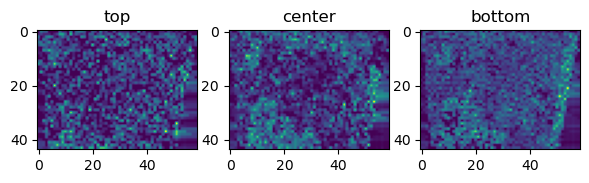

In [141]:
fig, axs = plt.subplots(1, len(rasters), figsize=(7, 3.5))
for i in range(len(rasters)):
    axs[i].imshow(rasters[i])
    axs[i].set_title(squash_methods[i])

In [142]:
t = sap.MaxTree(rasters[0])

In [143]:
t

MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (44, 59),
 'image_hash': 'f692c277',
 'image_name': None,
 'num_nodes': 3389}

In [144]:
area = t.get_attribute('area')

In [145]:
filtered_image = t.reconstruct(area > 500)

Text(0.5, 1.0, 'top after recon.')

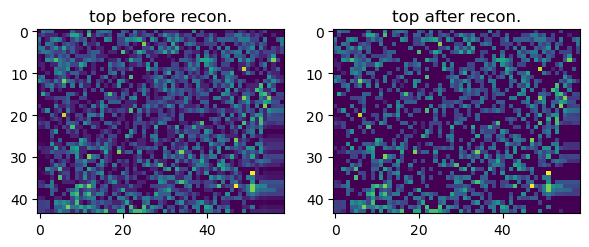

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))
axs[0].imshow(rasters[0])
axs[0].set_title('top before recon.') 
axs[1].imshow(filtered_image) 
axs[1].set_title('top after recon.')

In [147]:
aps = sap.attribute_profiles(rasters[0], {'area': [1, 50, 100, 200]})

Total:   0%|          | 0/9 [00:00<?, ?it/s]

area:   0%|          | 0/9 [00:00<?, ?it/s]

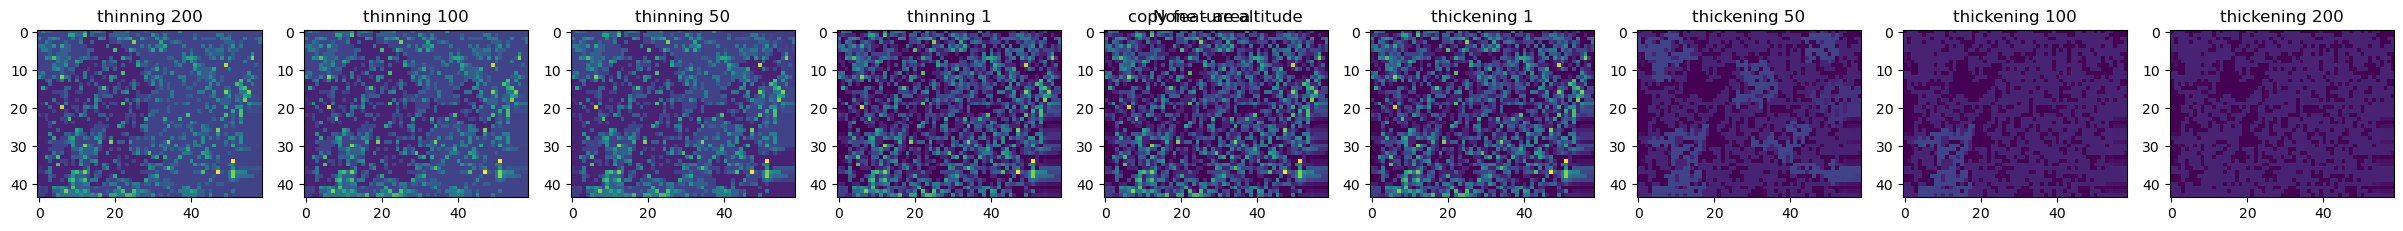

In [183]:
 sap.profiles.show_profiles(aps, 2.0)

In [149]:
aps = aps.vectorize()

In [170]:
aps = sap.attribute_profiles(rasters[0], {'area': [1, 50, 100, 200]})
diff_aps = sap.differential(aps)

Total:   0%|          | 0/9 [00:00<?, ?it/s]

area:   0%|          | 0/9 [00:00<?, ?it/s]

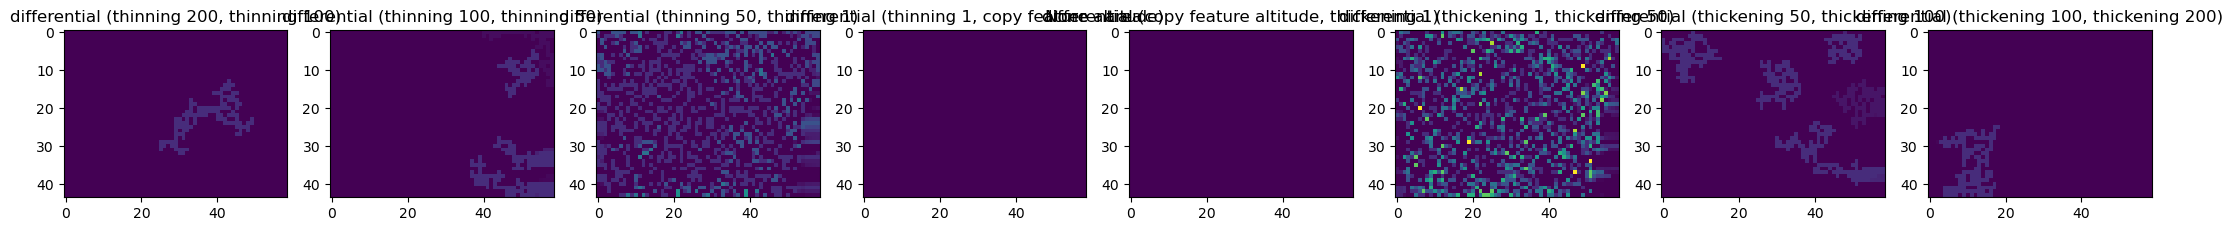

In [184]:
sap.profiles.show_profiles(diff_aps, 2.0)